In [1]:
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

from PIL import Image
import seaborn as sns
import koreanize_matplotlib

## 이미지 크기 확인

In [2]:
path = './data/image/train'
images_tr = glob.glob(f'{path}/*.jpg')

In [3]:
images_tr[1]

'./data/image/train\\train_000001.jpg'

In [4]:
image1 = Image.open(images_tr[1])

image1.size

(754, 565)

In [5]:
width = []
height = []

for img in tqdm(images_tr[:50000]):
    width.append(Image.open(img).width)
    height.append(Image.open(img).height)

100%|██████████| 50000/50000 [00:11<00:00, 4199.27it/s]


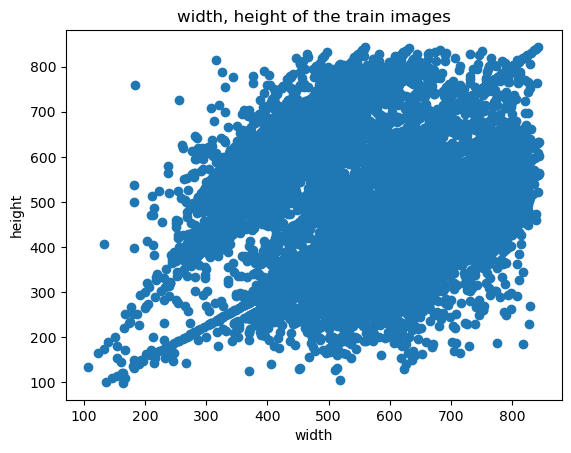

In [6]:
plt.figure()
plt.scatter(x=width, y=height)
plt.xlabel('width')
plt.ylabel('height')
plt.title('width, height of the train images')
plt.show()

## 질문 단어 개수 확인

In [7]:
import pandas as pd

text_tr = pd.read_csv('./data/train.csv')
text_tr.head()

,ID,image_id,question,answer
0,TRAIN_000000,train_000000,Is this in the wild or zoo?,zoo
1,TRAIN_000001,train_000001,Is this car a recent model?,yes
2,TRAIN_000002,train_000002,Is the man being safe?,yes
3,TRAIN_000003,train_000003,What are the walls made from?,drywall
4,TRAIN_000004,train_000004,How many players are sitting on the bench?,8


In [8]:
text_te = pd.read_csv('./data/test.csv')
text_te.head()

,ID,image_id,question
0,TEST_00000,test_00000,Is this a trade show?
1,TEST_00001,test_00001,Where are the people?
2,TEST_00002,test_00002,What color is the ski suit?
3,TEST_00003,test_00003,What color are the cabinets?
4,TEST_00004,test_00004,Is there a person standing in the background?


In [11]:
qe = text_tr.question.to_list()

In [12]:
qe

['Is this in the wild or zoo?',
 'Is this car a recent model?',
 'Is the man being safe?',
 'What are the walls made from?',
 'How many players are sitting on the bench?',
 'Is the airplane in the air?',
 'Where is the landing gear?',
 'What colors are the sheets?',
 'How many blue tents?',
 'Is this plane near an airport?',
 'Is the man wearing a hat?',
 'Are the trees in the distance oblong, or conic?',
 'Is the suitcase closed?',
 "Is the zebra on his back because he's playing?",
 'What is this animal doing?',
 'Are the blinds all the way up?',
 'Are the animals slimy?',
 'Who is on the coffee cup?',
 'Which apple does not have a stem?',
 'WHAT ARE THEY drinking?',
 'Where is the hand towel?',
 'What are the men doing?',
 'Are any cars visible?',
 'What is behind the couple?',
 'What street number is this?',
 "What color is the woman's helmet?",
 'Is this a home bathroom?',
 'What water sport is the person participating in?',
 "What color are the girl's shorts?",
 'What game is the 

In [14]:
cnt = []

for q in qe:
    cnt.append(len(q.split()))

text_tr['count'] = cnt

In [15]:
text_tr.head()

,ID,image_id,question,answer,count
0,TRAIN_000000,train_000000,Is this in the wild or zoo?,zoo,7
1,TRAIN_000001,train_000001,Is this car a recent model?,yes,6
2,TRAIN_000002,train_000002,Is the man being safe?,yes,5
3,TRAIN_000003,train_000003,What are the walls made from?,drywall,6
4,TRAIN_000004,train_000004,How many players are sitting on the bench?,8,8


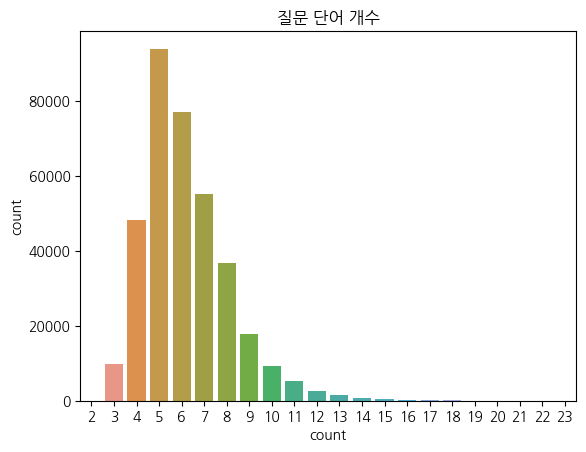

In [20]:
sns.countplot(data=text_tr, x='count')
plt.title('질문 단어 개수')
plt.show()

## 답변 형태 확인

In [24]:
text_tr[(text_tr.answer=='yes') | (text_tr.answer=='no')]

,ID,image_id,question,answer,count
1,TRAIN_000001,train_000001,Is this car a recent model?,yes,6
2,TRAIN_000002,train_000002,Is the man being safe?,yes,5
5,TRAIN_000005,train_000005,Is the airplane in the air?,no,6
9,TRAIN_000009,train_000009,Is this plane near an airport?,no,6
10,TRAIN_000010,train_000010,Is the man wearing a hat?,yes,6
...,...,...,...,...,...
359516,TRAIN_359516,train_051740,Are those cupcakes?,no,3
359517,TRAIN_359517,train_060224,Is the grass green?,no,4
359518,TRAIN_359518,train_095735,Is there a cover over the window?,yes,7
359519,TRAIN_359519,train_094673,Is the chair blue?,yes,4


In [25]:
y_n = len(text_tr[(text_tr.answer=='yes') | (text_tr.answer=='no')])
y_n

135595

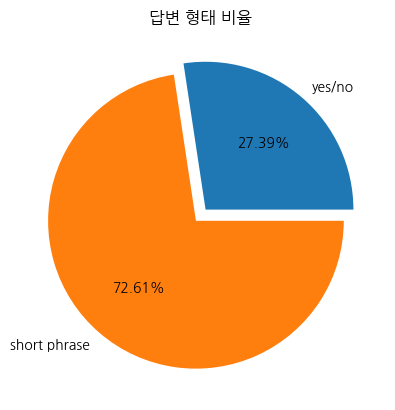

In [33]:
plt.pie([y_n, len(text_tr)], labels=['yes/no', 'short phrase'], autopct='%.2f%%', explode=[0.05,0.05])
plt.title('답변 형태 비율')
plt.show()

## 질문 앞 두 단어 빈도 확인

In [40]:
word_2 = []

for q in qe:
    word_2.append(' '.join(q.lower().split()[:2]))

text_tr['word_2'] = word_2

In [41]:
text_tr.head()

,ID,image_id,question,answer,count,word_2
0,TRAIN_000000,train_000000,Is this in the wild or zoo?,zoo,7,is this
1,TRAIN_000001,train_000001,Is this car a recent model?,yes,6,is this
2,TRAIN_000002,train_000002,Is the man being safe?,yes,5,is the
3,TRAIN_000003,train_000003,What are the walls made from?,drywall,6,what are
4,TRAIN_000004,train_000004,How many players are sitting on the bench?,8,8,how many


In [74]:
top_30 = pd.DataFrame(text_tr.word_2.value_counts()[:30])
top_30 = top_30.reset_index().rename(columns={'index':'word', 'word_2':'count'})
top_30

,word,count
0,what is,50064
1,how many,39253
2,is the,35423
3,what color,32875
4,is this,29269
5,is there,13351
6,what kind,9381
7,are the,8734
8,what are,8402
9,where is,7022


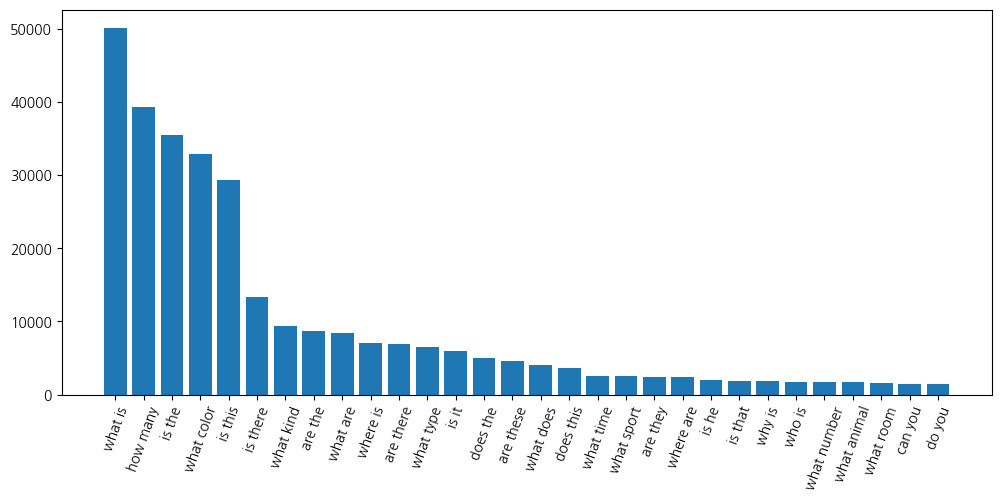

In [79]:
plt.figure(figsize=(12, 5))
plt.bar(top_30['word'], top_30['count'])
plt.xticks(rotation=70)
plt.show()

In [83]:
text_tr[~((text_tr.answer=='yes') | (text_tr.answer=='no'))].answer

0                 zoo
3             drywall
4                   8
6         under plane
7                 red
             ...     
359508       umbrella
359510          steel
359511      vitamin c
359513           blue
359514          glass
Name: answer, Length: 223926, dtype: object